In [1]:
# Importing necessary libraries for basic visualization as well as word clouds
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


# Pre-processing
import string
import re
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_json('/home/mbdell/Documents/Upgrad_Course/Masters/Datasets/Kindle_Store_5.json', lines=True)
df.head(10)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but I liked it pretty well. liked the characters, the plot..it had mystery, action, love, all of the main things. I think most western lovers would injoy this book",pretty good story,1404345600,NaN,NaN
1,5,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"If you've read other max brand westerns, you know what to expect, if not, you,'re in for a treat. Let's strap on our six guns! We gotta ride!",A very good book,1401062400,NaN,NaN
2,5,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,NaN
3,5,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},Jeff,"As usual for him, a good book",a good,1456963200,NaN,NaN
4,5,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},DEHS - EddyRapcon,"MB is one of the original western writers and after so many years and so many retreads the man is in a class all his own. Just like Zane Grey and Bret Harrell. This is an excellent read, from a time of real cowmen, for the genre.....ER",A Western,1441843200,2,NaN
5,5,True,"06 14, 2015",A9DXGM6YGV14D,B000FA5KK0,{'Format:': ' Kindle Edition'},Linda DeWachter,great book,Five Stars,1434240000,NaN,NaN
6,3,True,"06 2, 2015",A3MF8G33UKQLGL,B000FA5KK0,{'Format:': ' Kindle Edition'},mzbeastle,"A good, solid Western - yes, a little contrived and predictable, but I enjoyed it the same way I enjoy those old Republic ""B"" Westerns. It was a fun read, and I like the writing style as well as the author's use of language. I plan to read more Max Brand books, because they are entertaining without a lot of emotional investment. Sort of like a ""cozy mystery"" - there's a place for just about everything!","Fast read, entertaining, like a 1930s Western movie",1433203200,3,NaN
7,4,True,"05 3, 2015",A12AIK6DSUF1EW,B000FA5KK0,{'Format:': ' Kindle Edition'},R. DAVIS,ALMOST BEEN TOO LONG SINCE I READ IT. GOOD READ OR I WOULD NOT HAVE FINISHED IT,ANOTHER GOOD WESTERN,1430611200,NaN,NaN
8,5,True,"02 2, 2015",A2RW1CXT3XSLXW,B000FA5KK0,{'Format:': ' Kindle Edition'},Barbara Rigsby,"Enjoyed this book and will read more from this writer,have read other books and will read more. Very good story line.",Good,1422835200,NaN,NaN
9,4,True,"12 19, 2014",A2ID7H6SRK5XS0,B000FA5KK0,{'Format:': ' Kindle Edition'},Richard Johnson,A very good read for you Western fans. Great price too.,Get it,1418947200,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222983 entries, 0 to 2222982
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   verified        bool  
 2   reviewTime      object
 3   reviewerID      object
 4   asin            object
 5   style           object
 6   reviewerName    object
 7   reviewText      object
 8   summary         object
 9   unixReviewTime  int64 
 10  vote            object
 11  image           object
dtypes: bool(1), int64(2), object(9)
memory usage: 188.7+ MB


In [5]:
df.count()

overall           2222983
verified          2222983
reviewTime        2222983
reviewerID        2222983
asin              2222983
style             2170366
reviewerName      2222856
reviewText        2222580
summary           2221228
unixReviewTime    2222983
vote               291951
image                1365
dtype: int64

    There are about 2 million records of customer reviews in the dataset. It also has some missing values.

# Data Cleaning

    As a first step, we will check if there are any duplicates in the data, if there are any that can be removed. Duplicates are defined by columns reviewTime, reviewerID, asin, reviewerName, reviewText, summary 

In [6]:
#Drop duplicates
df.drop_duplicates(subset=['reviewTime','reviewerID','asin', 'reviewerName', 'reviewText', 'summary'], inplace=True)
df.count()

overall           2220617
verified          2220617
reviewTime        2220617
reviewerID        2220617
asin              2220617
style             2168760
reviewerName      2220490
reviewText        2220220
summary           2218862
unixReviewTime    2220617
vote               291617
image                1354
dtype: int64

    There are about >2300 records which are duplicates

In [7]:
## Dropping null values in columns reviewtext, summary
df.dropna(subset=['reviewText', 'summary'], inplace=True)

    Dropping null values in column reviewText and Summary as this might not help in sentiment classification

In [8]:
## Missing values Imputation 
df['style'].fillna('NotProvided', inplace=True)
df['style'] = df['style'].astype('str')
df['style'] = df['style'].apply(lambda x: x.replace('{','').replace('}','').replace(':','').replace("'","").replace('"', '').replace('Format','').strip())


df['vote'].fillna('0', inplace=True)

    Imputing values to column Style and Vote. The column style has 50k null values which was imputed with 'NotProvided'. Vote has null values imputed with 0.

In [9]:
## Derived columns for Computation
df['text'] = df['reviewText']+' ' +df['summary']
df['Year'] = pd.to_datetime(df['reviewTime']).dt.year
df['Year'] = df['Year'].astype('str')
df['word_count'] = df["text"].apply(lambda x: len(str(x).split(" ")))
df['review_len'] =df["text"].apply(lambda x: len(str(x)))

In [10]:
## Dropping columns that are unnecessary
df.drop(columns=['image','unixReviewTime', 'reviewerName','reviewTime', 'reviewerID', 'asin', 'reviewText', 'summary'], inplace=True)

In [11]:
df.head(5)

,overall,verified,style,vote,text,Year,word_count,review_len
0,4,True,Kindle Edition,0,"pretty good story, a little exaggerated, but I liked it pretty well. liked the characters, the plot..it had mystery, action, love, all of the main things. I think most western lovers would injoy this bookpretty good story",2014,38,222
1,5,True,Kindle Edition,0,"If you've read other max brand westerns, you know what to expect, if not, you,'re in for a treat. Let's strap on our six guns! We gotta ride!A very good book",2014,31,157
2,5,True,Kindle Edition,0,"Love Max, always a fun twistFive Stars",2016,7,38
3,5,True,Kindle Edition,0,"As usual for him, a good booka good",2016,8,35
4,5,True,Kindle Edition,2,"MB is one of the original western writers and after so many years and so many retreads the man is in a class all his own. Just like Zane Grey and Bret Harrell. This is an excellent read, from a time of real cowmen, for the genre.....ERA Western",2015,48,244


In [12]:
df.count()

overall       2218487
verified      2218487
style         2218487
vote          2218487
text          2218487
Year          2218487
word_count    2218487
review_len    2218487
dtype: int64

    Data is clean and ready to be pre-processed

# Data Pre-processing

In [13]:
#TEXT Pre-processing


##Remove nonAscii
def strip_non_ascii(data_str):
#''' Returns the string without non ASCII characters'''
    stripped = (c for c in data_str if 0 < ord(c) < 127)
    return ''.join(stripped)

##FIx abbreviations
def fix_abbreviation(data_str):
    data_str = data_str.lower()
    data_str = re.sub(r'\bthats\b', 'that is', data_str)
    data_str = re.sub(r'\bive\b', 'i have', data_str)
    data_str = re.sub(r'\bim\b', 'i am', data_str)
    data_str = re.sub(r'\bya\b', 'yeah', data_str)
    data_str = re.sub(r'\bcant\b', 'can not', data_str)
    data_str = re.sub(r'\bdont\b', 'do not', data_str)
    data_str = re.sub(r'\bwont\b', 'will not', data_str)
    data_str = re.sub(r'\bid\b', 'i would', data_str)
    data_str = re.sub(r'wtf', 'what the fuck', data_str)
    data_str = re.sub(r'\bwth\b', 'what the hell', data_str)
    data_str = re.sub(r'\br\b', 'are', data_str)
    data_str = re.sub(r'\bu\b', 'you', data_str)
    data_str = re.sub(r'\bk\b', 'OK', data_str)
    data_str = re.sub(r'\bsux\b', 'sucks', data_str)
    data_str = re.sub(r'\bno+\b', 'no', data_str)
    data_str = re.sub(r'\bcoo+\b', 'cool', data_str)
    data_str = re.sub(r'rt\b', '', data_str)
    data_str = data_str.strip()
    return data_str


##Remove punctuations mentions and alphanumeric characters
def remove_features(data_str):
# compile regex
    url_re = re.compile('https?://(www.)?\w+\.\w+(/\w+)*/?')
    punc_re = re.compile('[%s]' % re.escape(string.punctuation))
    num_re = re.compile('(\\d+)')
    mention_re = re.compile('@(\w+)')
    alpha_num_re = re.compile("^[a-z0-9_.]+$")
# convert to lowercase
    data_str = data_str.lower()
# remove hyperlinks
    data_str = url_re.sub(' ', data_str)
# remove @mentions
    data_str = mention_re.sub(' ', data_str)
# remove puncuation
    data_str = punc_re.sub(' ', data_str)
# remove numeric 'words'
    data_str = num_re.sub(' ', data_str)
# remove non1qw a-z 0-9 characters and words shorter than 1 characters
    list_pos = 0
    cleaned_str = ''
    for word in data_str.split():
        if list_pos == 0:
            if alpha_num_re.match(word):
                cleaned_str = word
            else:
                cleaned_str = ' '
        else:
            if alpha_num_re.match(word):
                cleaned_str = cleaned_str + ' ' + word
            else:
                cleaned_str += ' '
        list_pos += 1
# remove unwanted space, *.split() will automatically split on
# whitespace and discard duplicates, the " ".join() joins the
# resulting list into one string.
    return " ".join(cleaned_str.split())
# setup pyspark udf function



##Remove stop words
def remove_stops(data_str):
# expects a string
    stops = set(stopwords.words("english"))
    list_pos = 0
    cleaned_str = ''
    text = data_str.split()
    for word in text:
        if word not in stops:
# rebuild cleaned_str
            if list_pos == 0:
                cleaned_str = word
            else:
                cleaned_str = cleaned_str + ' ' + word
            list_pos += 1
    return cleaned_str


# Part-of-Speech Tagging
def tag_and_remove(data_str):
    cleaned_str = ' '
# noun tags
    nn_tags = ['NN', 'NNP', 'NNP', 'NNPS', 'NNS']
# adjectives
    jj_tags = ['JJ', 'JJR', 'JJS']
# verbs
    vb_tags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
    nltk_tags = nn_tags + jj_tags + vb_tags
# break string into 'words'
    text = data_str.split()
# tag the text and keep only those with the right tags
    tagged_text = pos_tag(text)
    for tagged_word in tagged_text:
        if tagged_word[1] in nltk_tags:
            cleaned_str += tagged_word[0] + ' '
    return cleaned_str


##Lemmatization
def lemmatize(data_str):
# expects a string
    list_pos = 0
    cleaned_str = ''
    lmtzr = WordNetLemmatizer()
    text = data_str.split()
    tagged_words = pos_tag(text)
    for word in tagged_words:
        if 'v' in word[1].lower():
            lemma = lmtzr.lemmatize(word[0], pos='v')
        else:
            lemma = lmtzr.lemmatize(word[0], pos='n')
        if list_pos == 0:
            cleaned_str = lemma
        else:
            cleaned_str = cleaned_str + ' ' + lemma
        list_pos += 1
    return cleaned_str

In [14]:
## Text Pre-processing is performed on the column 'text'

## Convert to lower case
df['text'] = df["text"].apply(lambda x: x.lower())

## Remove Non-ascii
df['text'] = df['text'].apply(strip_non_ascii)

## Fix abbrevation
#df['text'] = df['text'].apply(fix_abbreviation)

## remove_features
df['text'] = df['text'].apply(remove_features)




In [15]:
## remove_features
df['text'] = df['text'].apply(remove_stops)

In [16]:
## remove_features
#df['text'] = df['text'].apply(tag_and_remove)

## remove_features
#df['text'] = df['text'].apply(lemmatize)

df.head()

,overall,verified,style,vote,text,Year,word_count,review_len
0,4,True,Kindle Edition,0,pretty good story little exaggerated liked pretty well liked characters plot mystery action love main things think western lovers would injoy bookpretty good story,2014,38,222
1,5,True,Kindle Edition,0,read max brand westerns know expect treat let strap six guns gotta ride good book,2014,31,157
2,5,True,Kindle Edition,0,love max always fun twistfive stars,2016,7,38
3,5,True,Kindle Edition,0,usual good booka good,2016,8,35
4,5,True,Kindle Edition,2,mb one original western writers many years many retreads man class like zane grey bret harrell excellent read time real cowmen genre era western,2015,48,244


In [17]:
## Assigning Labels
df["labels"] = df["overall"]
df["labels"].replace({5.0: "positive",4.0:"positive",3.0:"neutral",2.0:"negative",1.0:"negative"}, inplace=True)
df["labels"].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [18]:
df.head(5)

,overall,verified,style,vote,text,Year,word_count,review_len,labels
0,4,True,Kindle Edition,0,pretty good story little exaggerated liked pretty well liked characters plot mystery action love main things think western lovers would injoy bookpretty good story,2014,38,222,positive
1,5,True,Kindle Edition,0,read max brand westerns know expect treat let strap six guns gotta ride good book,2014,31,157,positive
2,5,True,Kindle Edition,0,love max always fun twistfive stars,2016,7,38,positive
3,5,True,Kindle Edition,0,usual good booka good,2016,8,35,positive
4,5,True,Kindle Edition,2,mb one original western writers many years many retreads man class like zane grey bret harrell excellent read time real cowmen genre era western,2015,48,244,positive


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2218487 entries, 0 to 2222982
Data columns (total 9 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   overall     int64 
 1   verified    bool  
 2   style       object
 3   vote        object
 4   text        object
 5   Year        object
 6   word_count  int64 
 7   review_len  int64 
 8   labels      object
dtypes: bool(1), int64(3), object(5)
memory usage: 154.4+ MB


In [60]:
neutral = df[df['labels']=='neutral']['text']
neutral = ' '.join(neutral)

negative = df[df['labels']=='negative']['text']
negative = ' '.join(negative)

positive = df[df['labels']=='positive']['text']
positive = ' '.join(positive)

In [61]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer


# Most repeated words in reviews
stopwords = set(STOPWORDS) 
stopwords.update(["customer",'reviews'])

def frequent_words(text_data, title):
    # Create a counter for each work and it's frequency
    from collections import Counter
    Counter = Counter(text_data.split()) 
    # Keep top X words with higher frequency
    most_occur = Counter.most_common(100) 
    
    freq_words = ' '.join([x[0] for x in most_occur])
    # Create and generate a word cloud image:
    wordcloud = WordCloud(
    background_color = "white",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(freq_words)
    fig = plt.figure(figsize = (7.5, 7.5))
    plt.axis("off")
    if title: 
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.25)
    plt.imshow(wordcloud)
    plt.show()

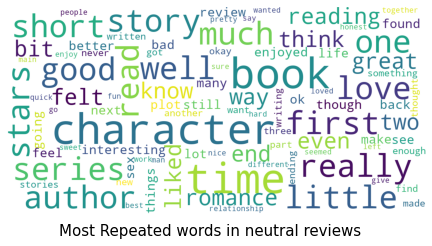

In [62]:
frequent_words(neutral, "Most Repeated words in neutral reviews")

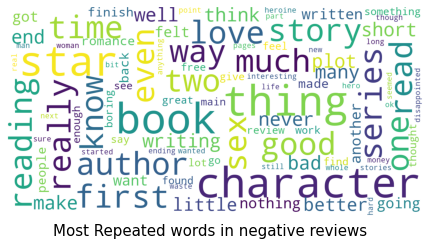

In [63]:
frequent_words(negative, "Most Repeated words in negative reviews")

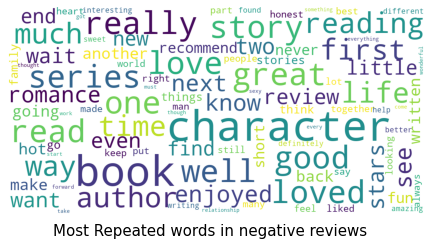

In [64]:
frequent_words(positive, "Most Repeated words in positive reviews")

# Univariate Analysis

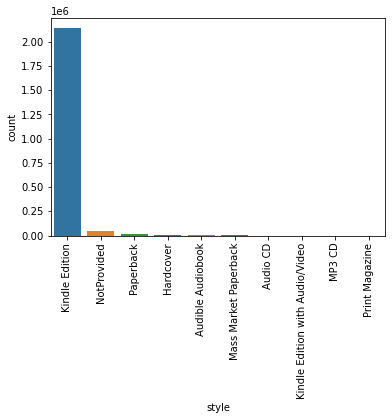

In [66]:
## Finding the most reviewed product
plt.xticks(rotation=90)
sns.countplot(x='style',data=df,order=pd.value_counts(df['style']).iloc[:10].index)
plt.show()

Most reviewed product is Kindle Edition. 

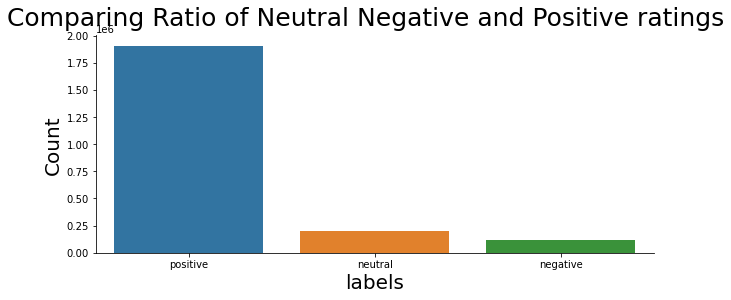

In [67]:
# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(10,4))
fig.suptitle("Comparing Ratio of Neutral Negative and Positive ratings", fontsize = 25)
#plt.tight_layout(pad = 3.5)
sns.countplot(x = "labels", data = df)
axes.set_xlabel("labels", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

Most of the reviews chosen are rated as positive. It means the customers tend to write reviews when they feel positive about the prouduct

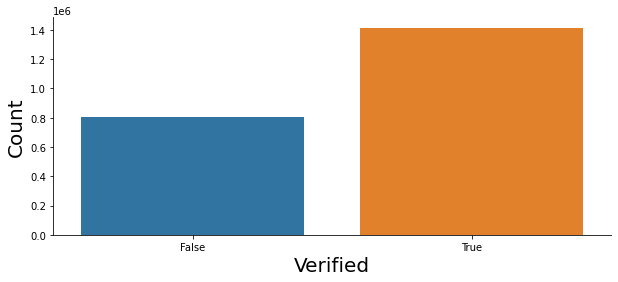

In [68]:
# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(10,4))
#plt.tight_layout(pad = 3.5)
sns.countplot(x="verified", data=df)
axes.set_xlabel("Verified", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

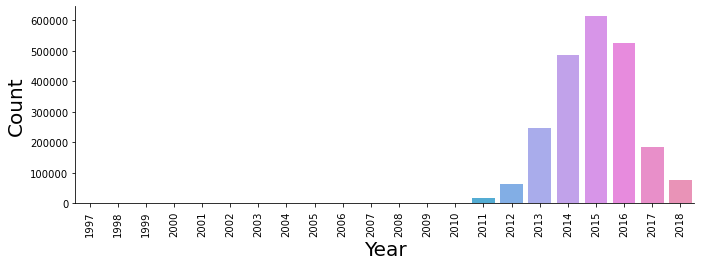

In [69]:
## Bivariate Analysis 
# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(10,4))
plt.tight_layout(pad = 3.5)
plt.xticks(rotation=90)
sns.countplot(x="Year", data=df)
axes.set_xlabel("Year", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

Large number of reviews were provided from year 2013

# Bi-Variate Analysis

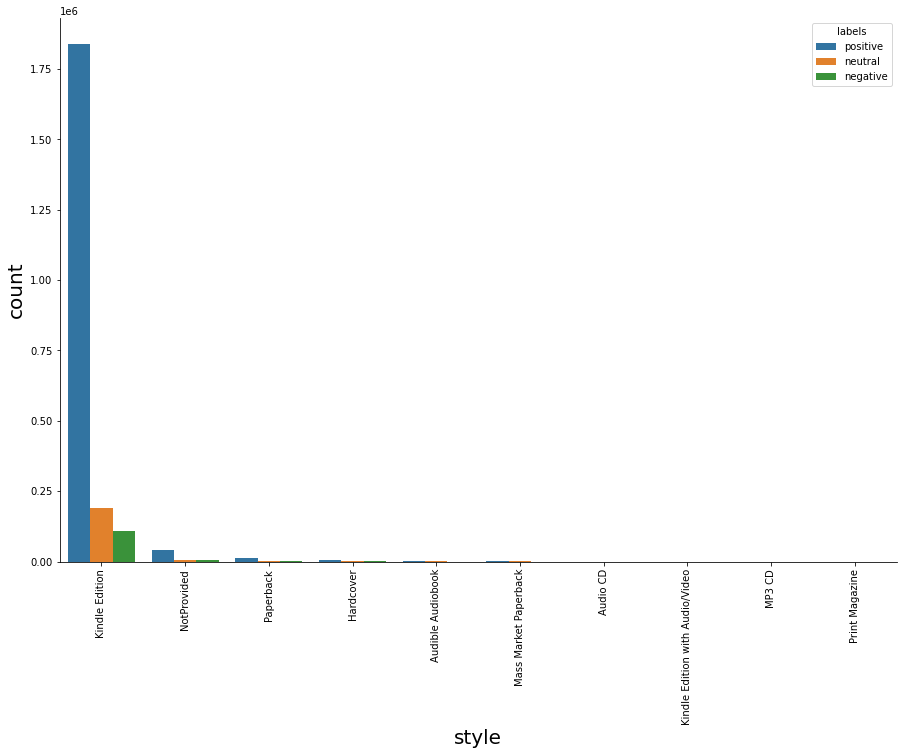

In [73]:
## reviews for product
# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(15,10))
plt.xticks(rotation=90)
axes.set_xlabel("Style", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.countplot(x='style',data=df,order=pd.value_counts(df['style']).iloc[:10].index, hue='labels')
sns.despine()

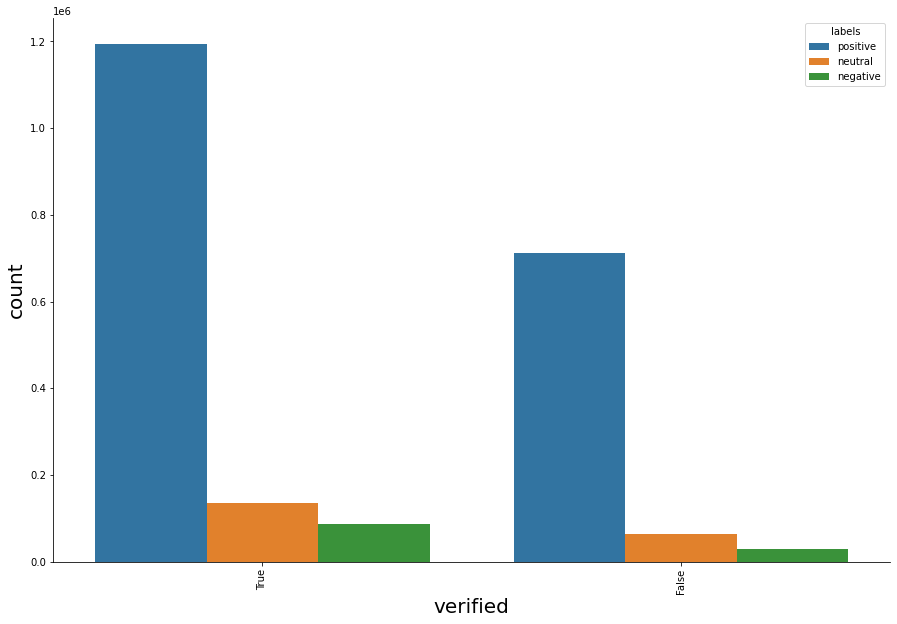

In [74]:
## reviews for product
# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(15,10))
plt.xticks(rotation=90)
axes.set_xlabel("verified", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.countplot(x='verified',data=df,order=pd.value_counts(df['verified']).iloc[:10].index, hue='labels')
sns.despine()

In [77]:
# Using textblob to generate sentiment for easy visualization
from textblob import TextBlob
# calculating sentiment polarity using external libraries
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df.head()

,overall,verified,style,vote,text,Year,word_count,review_len,labels,sentiment
0,4,True,Kindle Edition,0,pretty good story little exaggerated liked pretty well liked characters plot mystery action love main things think western lovers would injoy bookpretty good story,2014,38,222,positive,0.264931
1,5,True,Kindle Edition,0,read max brand westerns know expect treat let strap six guns gotta ride good book,2014,31,157,positive,0.700000
2,5,True,Kindle Edition,0,love max always fun twistfive stars,2016,7,38,positive,0.400000
3,5,True,Kindle Edition,0,usual good booka good,2016,8,35,positive,0.383333
4,5,True,Kindle Edition,2,mb one original western writers many years many retreads man class like zane grey bret harrell excellent read time real cowmen genre era western,2015,48,244,positive,0.315625


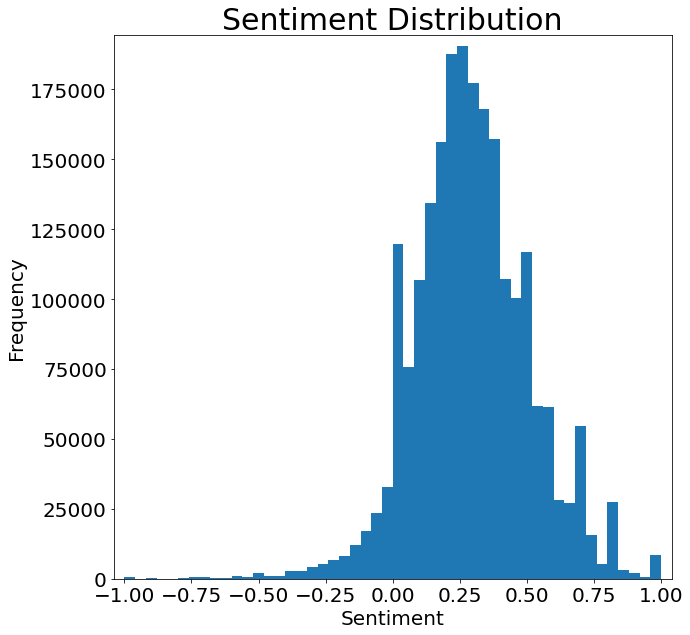

In [78]:
#Barchart using to visualize the sentiment distribution generated above
plt.figure(figsize=(10,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=20)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()

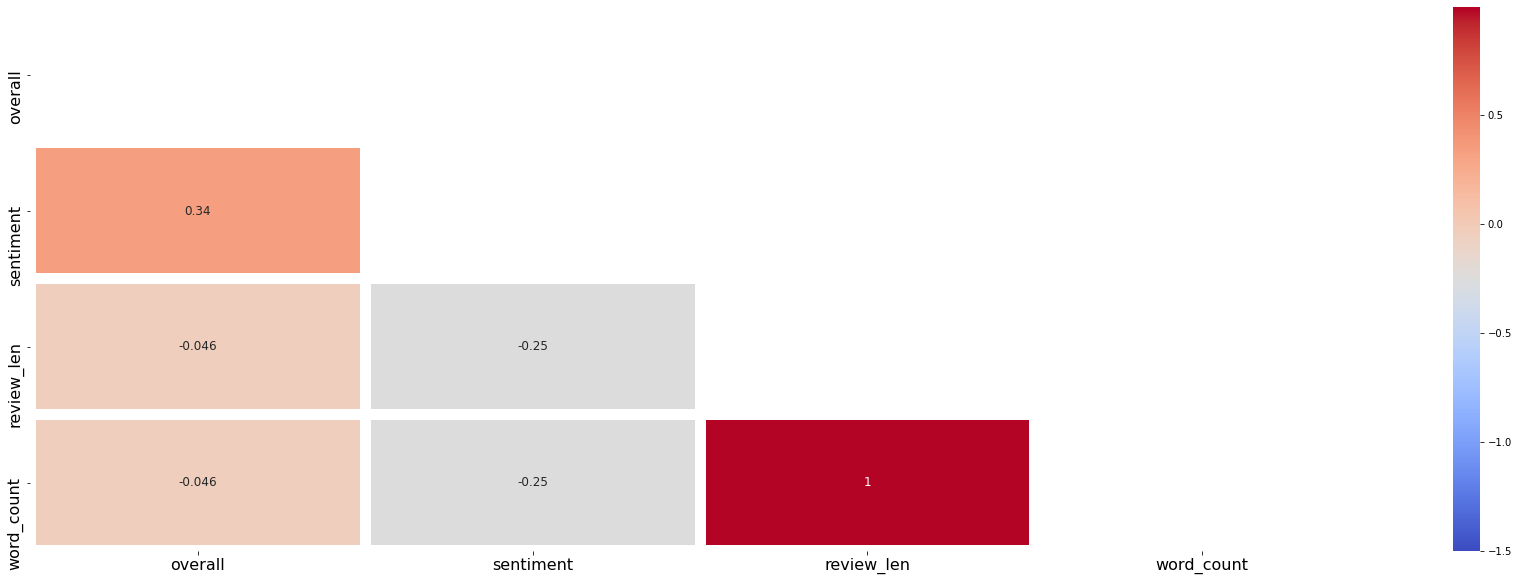

In [79]:

# visualising the heatmap
correlation = df[['overall','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(30,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 12}, linewidths=10, vmin=-1.5, mask=mask)

In [80]:
df.head()

,overall,verified,style,vote,text,Year,word_count,review_len,labels,sentiment
0,4,True,Kindle Edition,0,pretty good story little exaggerated liked pretty well liked characters plot mystery action love main things think western lovers would injoy bookpretty good story,2014,38,222,positive,0.264931
1,5,True,Kindle Edition,0,read max brand westerns know expect treat let strap six guns gotta ride good book,2014,31,157,positive,0.700000
2,5,True,Kindle Edition,0,love max always fun twistfive stars,2016,7,38,positive,0.400000
3,5,True,Kindle Edition,0,usual good booka good,2016,8,35,positive,0.383333
4,5,True,Kindle Edition,2,mb one original western writers many years many retreads man class like zane grey bret harrell excellent read time real cowmen genre era western,2015,48,244,positive,0.315625


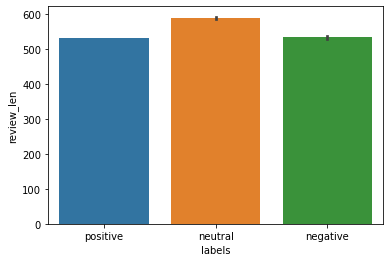

In [82]:
# boxplot of a variable across various product categories
sns.barplot(x='labels', y='review_len', data=df)
plt.show()

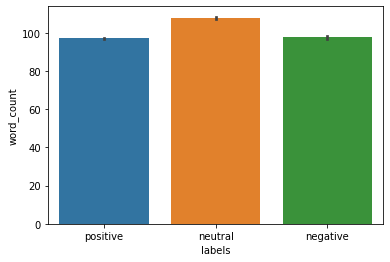

In [83]:
# boxplot of a variable across various product categories
sns.barplot(x='labels', y='word_count', data=df)
plt.show()

# Most popular Bi-grams in the dataset

In [84]:

# Function for bigram
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]# apply function above 

In [87]:
neu = df[df['labels']=='neutral']['text']
pos = df[df['labels']=='positive']['text']
neg = df[df['labels']=='negative']['text']

In [93]:
print(neu.dtype)

object


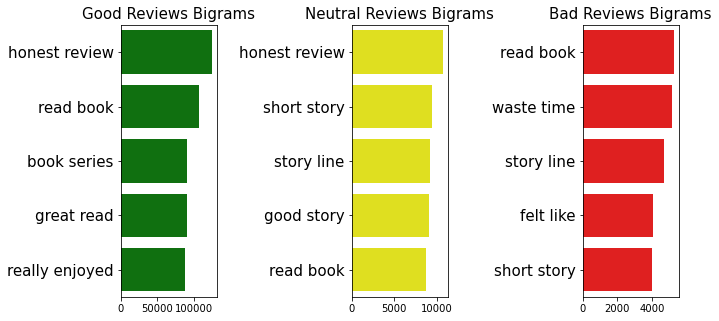

In [94]:
# create a function for bigram plots
def n_gram_plot(data,title,color):
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 5)
common_words_neutral= get_top_n_bigram(neu, 5)
common_words_bad= get_top_n_bigram(neg, 5)

# bigram plot using function above
plt.figure(figsize=(10,5))
# good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Good','green')
#============================================= 
#neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','yellow')
#============================================= 
#bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Bad','red')
plt.show()